## Tanzania Water Wells

## Business understanding

##### Tanzania is an East African country with about 59,678,000 in population (2021 est.), and located just south of the Equator. It is a developing country that still has struggles with providing clean water to its entire population. There are many water points already established in the country, but some are in great need of repair while others have failed altogether.

##### An NGO focused on locating wells needing repair is looking to find patterns in non-functional wells to influence how new wells are built.

## Data understanding

This project analyzes the Tanzanian Water Wells datasets released by the Tanzanian Government. The dataset includes 59,400 rows each repressenting a unique well within the Tanzanian Governments realm. Our targets are broken down into three categories:

* `Functional `
* `Non Functional`
* `Functional Needs Repair`

We will attempt to predict the status of the wells condition through utilizing Exploratory Data Analysis (EDA) and building classification models tuned to the parameters that will have the largest impact on our predictive ability.

This dataset comes with two applicable files training_set_labels and training_set_values. During our EDA we will join these tables together to give us one file to work with. The values dataset has 39 total columns and contains all of our predicitve features. Below is a description of each column.

* `amount_tsh `: Total static head (amount water available to waterpoint)
* `date_recorded` : The date the row was entered
* `funder `: Who funded the well
* `gps_height` : Altitude of the well
* `installer` : Organization that installed the well
* `longitude` : GPS coordinate
* `latitude `: GPS coordinate
* `wpt_name `: Name of the waterpoint if there is one
* `num_private` :Private use or not
* `basin `: Geographic water basin
* `subvillage` : Geographic location
* `region `: Geographic location
* `region_code` : Geographic location (coded)
* `district_code` : Geographic location (coded)
* `lga` : Geographic location
* `ward` : Geographic location
* `population` : Population around the well
* `public_meeting` : True/False
* `recorded_by `: Group entering this row of data
* `scheme_management` : Who operates the waterpoint
* `scheme_name `: Who operates the waterpoint
* `permit `: If the waterpoint is permitted
* `construction_year` : Year the waterpoint was constructed
* `extraction_type `: The kind of extraction the waterpoint uses
* `extraction_type_group` : The kind of extraction the waterpoint uses
* `extraction_type_class` : The kind of extraction the waterpoint uses
* `management `: How the waterpoint is managed
* `management_group` : How the waterpoint is managed
* `payment `: What the water costs
* `payment_type` : What the water costs
* `water_quality` : The quality of the water
* `quality_group `: The quality of the water
* `quantity `: The quantity of water
* `quantity_group` : The quantity of water
* `source `: The source of the water
* `source_type` : The source of the water
* `source_class` : The source of the water
* `waterpoint_type` : The kind of waterpoint
* `waterpoint_type_group `: The kind of waterpoint
``

## Data preparation

### Data inspection

Import required libraries to be used in the data, merge the data together and proceed to check for null values and duplicates in the data

In [150]:
#Import required libraries 
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt

In [151]:
#load the data
training_set = pd.read_csv("Data/training-set-values.csv")
training_label  = pd.read_csv("Data/training-set-labels.csv")
training_label
training_set

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,3/14/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,3/6/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2/25/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,1/28/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,7/13/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,5/3/2013,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,5/7/2011,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,4/11/2011,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,3/8/2011,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [152]:
training_label.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [153]:
#Merge the two dataframe together using the id column and name it df
df = pd.merge(training_set, training_label, on='id')
df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,3/14/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,3/6/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2/25/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,1/28/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,7/13/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,5/3/2013,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,5/7/2011,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,4/11/2011,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,3/8/2011,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [154]:
#check for nan values in df
pd.option_context('display.max_rows', None)
df.isna().sum()/len(df)*100 


id                        0.000000
amount_tsh                0.000000
date_recorded             0.000000
funder                    6.119529
gps_height                0.000000
installer                 6.153199
longitude                 0.000000
latitude                  0.000000
wpt_name                  0.000000
num_private               0.000000
basin                     0.000000
subvillage                0.624579
region                    0.000000
region_code               0.000000
district_code             0.000000
lga                       0.000000
ward                      0.000000
population                0.000000
public_meeting            5.612795
recorded_by               0.000000
scheme_management         6.526936
scheme_name              47.417508
permit                    5.144781
construction_year         0.000000
extraction_type           0.000000
extraction_type_group     0.000000
extraction_type_class     0.000000
management                0.000000
management_group    

### Data cleaning

Check missing values for columns with missing values and handle each column 

In [155]:
#Display the columns with missing values
df[['funder','installer','subvillage','public_meeting','scheme_management','scheme_name','permit']]

,funder,installer,subvillage,public_meeting,scheme_management,scheme_name,permit
0,Roman,Roman,Mnyusi B,True,VWC,Roman,False
1,Grumeti,GRUMETI,Nyamara,NaN,Other,NaN,True
2,Lottery Club,World vision,Majengo,True,VWC,Nyumba ya mungu pipe scheme,True
3,Unicef,UNICEF,Mahakamani,True,VWC,NaN,True
4,Action In A,Artisan,Kyanyamisa,True,NaN,NaN,True
...,...,...,...,...,...,...,...
59395,Germany Republi,CES,Kiduruni,True,Water Board,Losaa Kia water supply,True
59396,Cefa-njombe,Cefa,Igumbilo,True,VWC,Ikondo electrical water sch,True
59397,NaN,NaN,Madungulu,True,VWC,NaN,False
59398,Malec,Musa,Mwinyi,True,VWC,NaN,True


In [156]:
# first check for duplicated rows and drop them
df.duplicated().sum()

0

Since there are no duplicates in this data and there is no numeric data type to replace with measures of central tendency`(mean,mode and median)`, we handle the missing value by each row

To handle `scheme name`, it is explained to be the one who operates the waterpoint. It is described the same way as `scheme management`  therefore it is reasonable to drop one. In this case, we drop `scheme name` due to high missing values

In [157]:
#drop scheme name column
df.drop('scheme_name', axis=1, inplace=True)
df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,3/14/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,3/6/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2/25/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,1/28/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,7/13/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,5/3/2013,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,5/7/2011,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,4/11/2011,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,3/8/2011,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


Since most funding organisations end up being the `installers` of the waterfront, it is safe to place the `funders` name in place of `installer` and `installer` in place of `funders` name. In place of both being `Nan`, we can replace with `None`

In [158]:
#check null in both rows before filling
df[['funder','installer']].isna().sum()

funder       3635
installer    3655
dtype: int64

In [159]:
#filling null values in funder with data from installer
df['funder'].fillna(df['installer'], inplace=True)
#filling null values in installer with data from funder
df['installer'].fillna(df['funder'], inplace=True)
#Check for the change
df[['funder','installer']].isna().sum()

funder       3582
installer    3582
dtype: int64

In [160]:
#replace the rest with None
df['funder'].fillna('unknown', inplace=True)
df['installer'].fillna('unknown', inplace=True)

The null values in `subvillage` have less than 1% of the data. The null values are dropped.

In [161]:
#drop the null rows on subvillage column
df.dropna(subset=['subvillage'], inplace = True)
df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,3/14/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,3/6/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2/25/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,1/28/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,7/13/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,5/3/2013,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,5/7/2011,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,4/11/2011,unknown,0,unknown,34.017087,-8.750434,Mashine,0,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,3/8/2011,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


With `public meeting` and `permit` columns we replace with `False` to assume that there was no public meetting and there was also no permit given.

In [162]:
# fill the null values with False 
df['public_meeting'].fillna(False, inplace=True)
df['permit'].fillna(False, inplace=True)

In [163]:
#
df['scheme_management'].value_counts()

VWC                 36437
WUG                  5206
Water authority      3147
WUA                  2883
Water Board          2747
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

According to the categories given in scheme management, there is a none category. Given we do not have any data on that column, we will place null values in none category


In [164]:
# fill the null values with False 
df['scheme_management'].fillna(False, inplace=True)

### Exploratory Data Analysis(EDA)

In [165]:
#check the columns and their data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59029 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59029 non-null  int64  
 1   amount_tsh             59029 non-null  float64
 2   date_recorded          59029 non-null  object 
 3   funder                 59029 non-null  object 
 4   gps_height             59029 non-null  int64  
 5   installer              59029 non-null  object 
 6   longitude              59029 non-null  float64
 7   latitude               59029 non-null  float64
 8   wpt_name               59029 non-null  object 
 9   num_private            59029 non-null  int64  
 10  basin                  59029 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59029 non-null  object 
 13  region_code            59029 non-null  int64  
 14  district_code          59029 non-null  int64  
 15  lg

Get the summary statistics of the numeric data

In [166]:
# check to see the summary statistics
df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59029.000000,59029.000000,59029.000000,59029.000000,5.902900e+04,59029.000000,59029.000000,59029.000000,59029.000000,59029.000000
mean,37126.674956,319.646832,672.299582,34.062263,-5.704219e+00,0.477121,15.383811,5.646614,180.941097,1308.488048
std,21455.814250,3006.873793,693.281914,6.585080,2.954644e+00,12.274565,17.606846,9.661485,472.709908,949.095754
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18533.000000,0.000000,0.000000,33.079614,-8.563705e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37077.000000,0.000000,377.000000,34.889047,-5.000106e+00,0.000000,12.000000,3.000000,30.000000,1986.000000
75%,55671.000000,25.000000,1322.000000,37.189623,-3.323780e+00,0.000000,17.000000,5.000000,220.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


The `average amount tsh` used is `319.6tsh`<br>
The `average population` per well is `180`

Get the categories of data based on the `status group` being either `functional`, `non-functional` and `functional needs repair`.

In [167]:
#Creating function to plot basic countplot for each column
def count_plot(col):
    plt.figure(figsize=(15,8))
    ax= sns.countplot(x=col, hue="status_group", data=df)

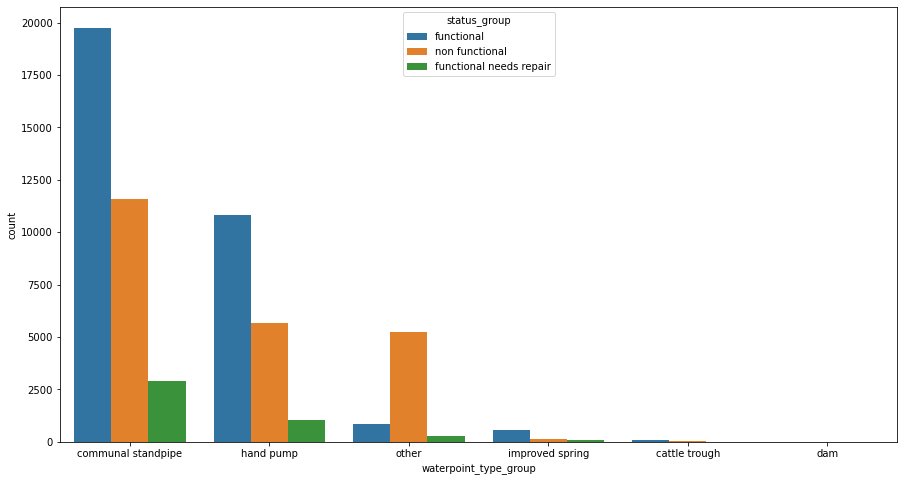

In [169]:
#Get the population around the well
count_plot('waterpoint_type_group')

The `communal standpipe` is the most common waterfront well.<br>
In `other` category, there are more `non-functional` wells than `functional` and `functional needs repair` combined being about 5000 non-functional wells.<br>
In the observation, it is seen most wells are `functional`, followed by `non-functional` and then little needing `repair`


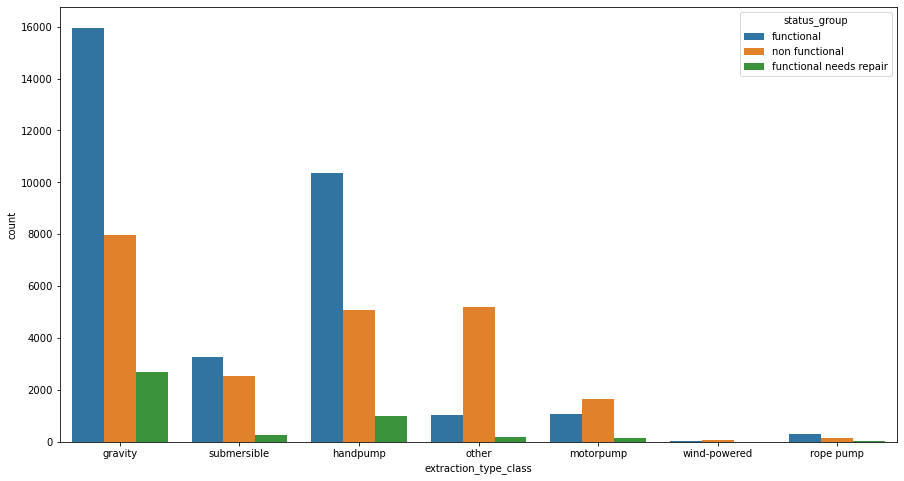

In [179]:
# Plot countplot to show extraction type class
count_plot('extraction_type_class')

The extraction type of water that is mostly used is gravity. Since `gravity` is very `cost efficient`, it would make sense that most would prefer gravity to other extraction type.

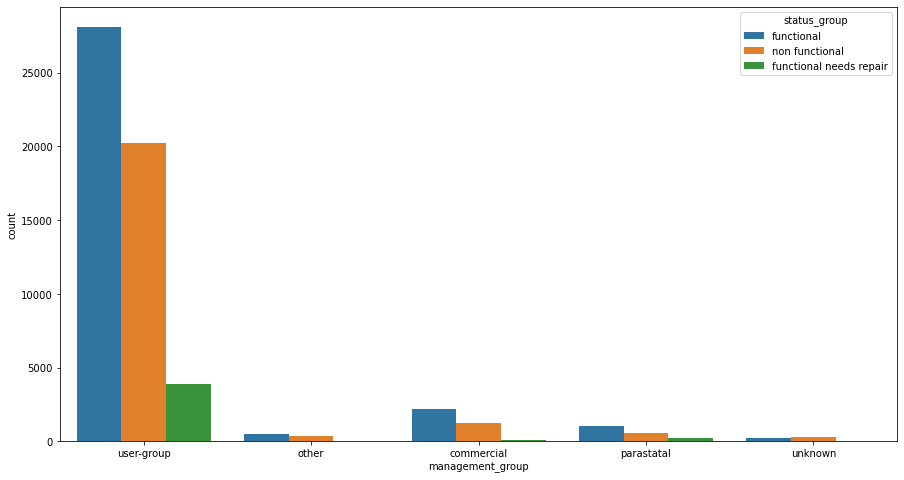

In [195]:
#Plot the countplot to show the management group
count_plot('management_group')

Most of the waterwells are managed by `user-groups`

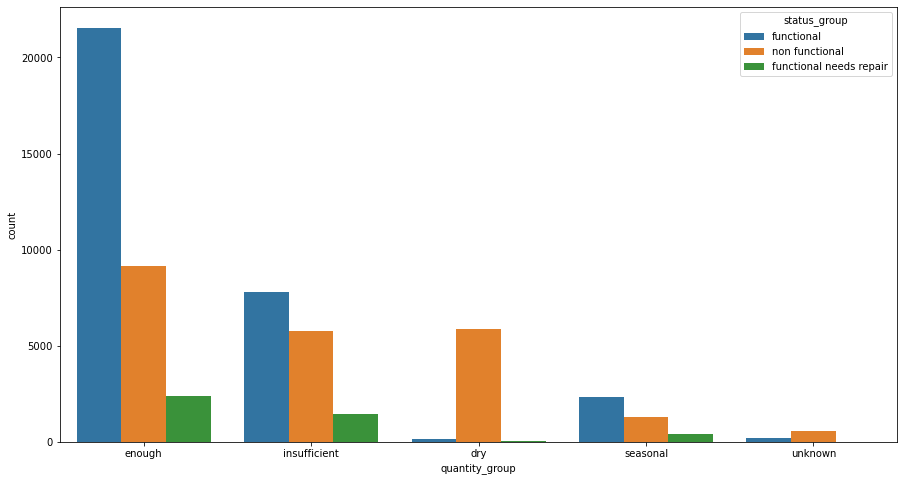

In [181]:
count_plot('quantity_group')

The `quantity group` which means the the quantity of water the well produces. It is seen that most wells produce `enough` water.<br>
In `dry` places most wells are `non-functional`

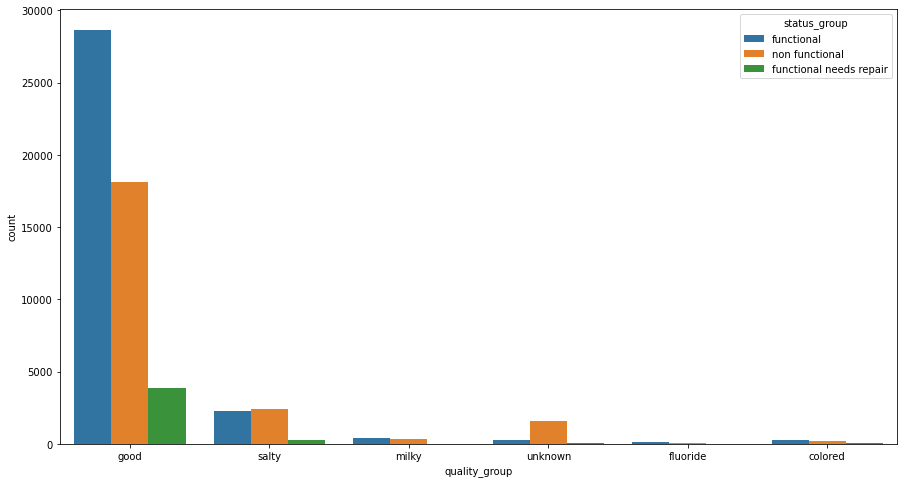

In [182]:
count_plot('quality_group')

In `quality group` which is the quality of water, most of the water is of good quality.<br>
In `unknown` quality, most wells are non-functional.<br>
In `salty` water, functional and non-functional waterpoint are almost equally matched.

In [183]:
df['date_recorded'].value_counts()

3/17/2011    558
2/3/2013     546
3/15/2011    546
3/14/2011    504
3/16/2011    491
            ... 
7/1/2004       1
9/27/2011      1
9/12/2011      1
3/6/2004       1
9/5/2011       1
Name: date_recorded, Length: 356, dtype: int64

To get the date pumps were recorded would be too specific and not easy to plot, hence we split the date to years to get the difference between when the year the waterfront was built and the year it was recorded

In [187]:
#change the column to date time
df['date_recorded'] = pd.to_datetime(df['date_recorded'])
# Create a new colmn for years recorded
df['year_recorded'] = df['date_recorded'].apply(lambda x: x.year)
# create a new column for month recorded
df['month_recorded'] = df['date_recorded'].apply(lambda x: x.month)

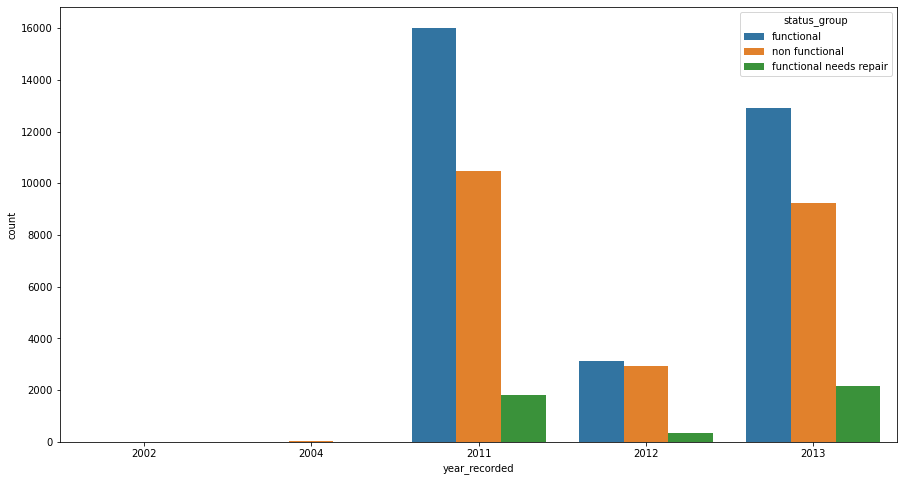

In [189]:
#plot the years the wells were recorded
count_plot('year_recorded')

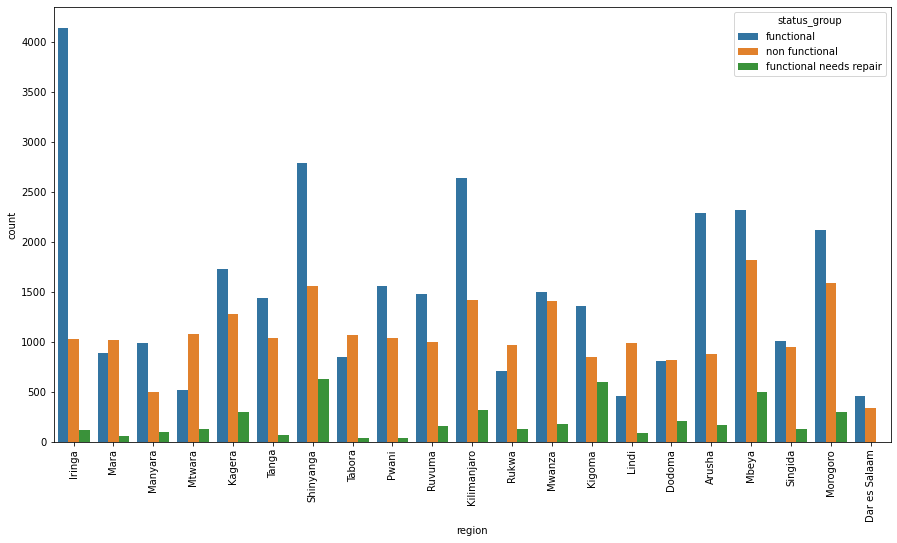

In [194]:
# Plot countplot of water wells in each region
count_plot('region')
plt.xticks(rotation= 90)
plt.show()

Most regions have `functional` water wells.<br>
`Iringa` region has the most `functional` wells.<br>
`Mbeya` region has the most `non-functional` wells.<br>
`shinganya` region has the most `functional need repair` wells